In [6]:
import os
import json
import random

from PIL import Image, ImageDraw, ImageFont
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
COLOR = {
    'finger': (120,203,228),
    'Trapezoid': (145,42,177),
    'Pisiform': (145,42,177),
    'Radius': (210,71,77),
    'Ulna': (210,71,77),
    'wrist': (193,223,159)
}

In [8]:
def random_vis_with_pil(method: str):
    img_root = os.path.join('../data', method, 'DCM')
    annot_root = os.path.join('../data', method, 'outputs_json')
    
    img_items = glob(os.path.dirname(os.path.join(img_root, "*", "*")))
    img_item = random.choice(img_items)
    folder_name = img_item.split('/')[-1]
    
    img_paths = glob(os.path.join(img_item, f"*.png"))
    annot_paths = glob(os.path.join(annot_root, folder_name, f"*.json"))
    
    l_img_path, r_img_path = sorted(img_paths)
    l_annot_path, r_annot_path = sorted(annot_paths)
        
    l_img = Image.open(l_img_path).convert("RGB")
    l_img_draw = ImageDraw.Draw(l_img)
    r_img = Image.open(r_img_path).convert("RGB")
    r_img_draw = ImageDraw.Draw(r_img)
    
    l_json = json.load(open(l_annot_path))
    r_json = json.load(open(r_annot_path))
    
    font = ImageFont.truetype("ARIAL.TTF", 20)
    lpts, rpts = [], []
    for annot in l_json['annotations']:
        points = [tuple(pts) for pts in annot['points']]
        orin_label = annot['label'] 
        label = orin_label
        if label.startswith('finger'):
            label = 'finger'
        elif label not in COLOR:
            label = 'wrist'
        l_img_draw.polygon(points, fill=COLOR[label], outline='black')
        cx, cy = sum([p[0] for p in points]) / len(points), sum([p[1] for p in points]) / len(points)
        lpts.append((cx, cy, orin_label))
        
    for annot in r_json['annotations']:
        points = [tuple(pts) for pts in annot['points']]
        orin_label = annot['label'] 
        label = orin_label
        if label.startswith('finger'):
            label = 'finger'
        elif label not in COLOR:
            label = 'wrist'
        r_img_draw.polygon(points, fill=(COLOR[label]), outline='black')
        cx, cy = sum([p[0] for p in points]) / len(points), sum([p[1] for p in points]) / len(points)
        rpts.append((cx, cy, orin_label))
        
    for (cx, cy, orin_label) in lpts:
        l_img_draw.text((cx, cy), orin_label, fill=((255, 255, 255)), font=font)
    for (cx, cy, orin_label) in rpts:
        r_img_draw.text((cx, cy), orin_label, fill=((255, 255, 255)), font=font)

    if not os.path.exists('vis_res'):
        os.makedirs('vis_res')
    
    l_img.save(os.path.join('vis_res', f"left.png"))
    r_img.save(os.path.join('vis_res', f"right.png"))
    

In [9]:
random_vis_with_pil('train')

In [28]:
def random_vis_with_plt(method: str):
    img_root = os.path.join('../data', method, 'DCM')
    annot_root = os.path.join('../data', method, 'outputs_json')
    
    img_items = glob(os.path.dirname(os.path.join(img_root, "*", "*")))
    img_item = random.choice(img_items)
    folder_name = img_item.split('/')[-1]
    
    img_paths = glob(os.path.join(img_item, f"*.png"))
    annot_paths = glob(os.path.join(annot_root, folder_name, f"*.json"))
    
    l_img_path, r_img_path = sorted(img_paths)
    l_annot_path, r_annot_path = sorted(annot_paths)
        
    l_img = Image.open(l_img_path).convert("RGB")
    r_img = Image.open(r_img_path).convert("RGB")
    l_json = json.load(open(l_annot_path))
    r_json = json.load(open(r_annot_path))
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 15))
    
    axes[0].imshow(l_img)
    axes[0].set_title(l_img_path)
    axes[0].axis('off')
    for annot in l_json['annotations']:
        points = [tuple(pts) for pts in annot['points']]
        orin_label = annot['label'] 
        label = orin_label
        if label.startswith('finger'):
            label = 'finger'
        elif label not in COLOR:
            label = 'wrist'
            
        poly = patches.Polygon(
            points, 
            closed=True, 
            facecolor=[ck/255 for ck in COLOR[label]], 
            edgecolor='black',
            alpha=0.7
        )
        axes[0].add_patch(poly)
        cx, cy = sum([p[0] for p in points]) / len(points), sum([p[1] for p in points]) / len(points)
        axes[0].text(cx, cy, orin_label, fontsize=8, color='white')

    axes[1].imshow(r_img)
    axes[1].set_title(r_img_path)
    axes[1].axis('off')
    for annot in r_json['annotations']:
        points = [tuple(pts) for pts in annot['points']]
        orin_label = annot['label'] 
        label = orin_label
        if label.startswith('finger'):
            label = 'finger'
        elif label not in COLOR:
            label = 'wrist'
            
        poly = patches.Polygon(
            points, 
            closed=True, 
            facecolor=[ck/255 for ck in COLOR[label]], 
            edgecolor='black',
            alpha=0.7
        )
        axes[1].add_patch(poly)
        cx, cy = sum([p[0] for p in points]) / len(points), sum([p[1] for p in points]) / len(points)
        axes[1].text(cx, cy, orin_label, fontsize=8, color='white')
        
    plt.tight_layout()
    plt.show()

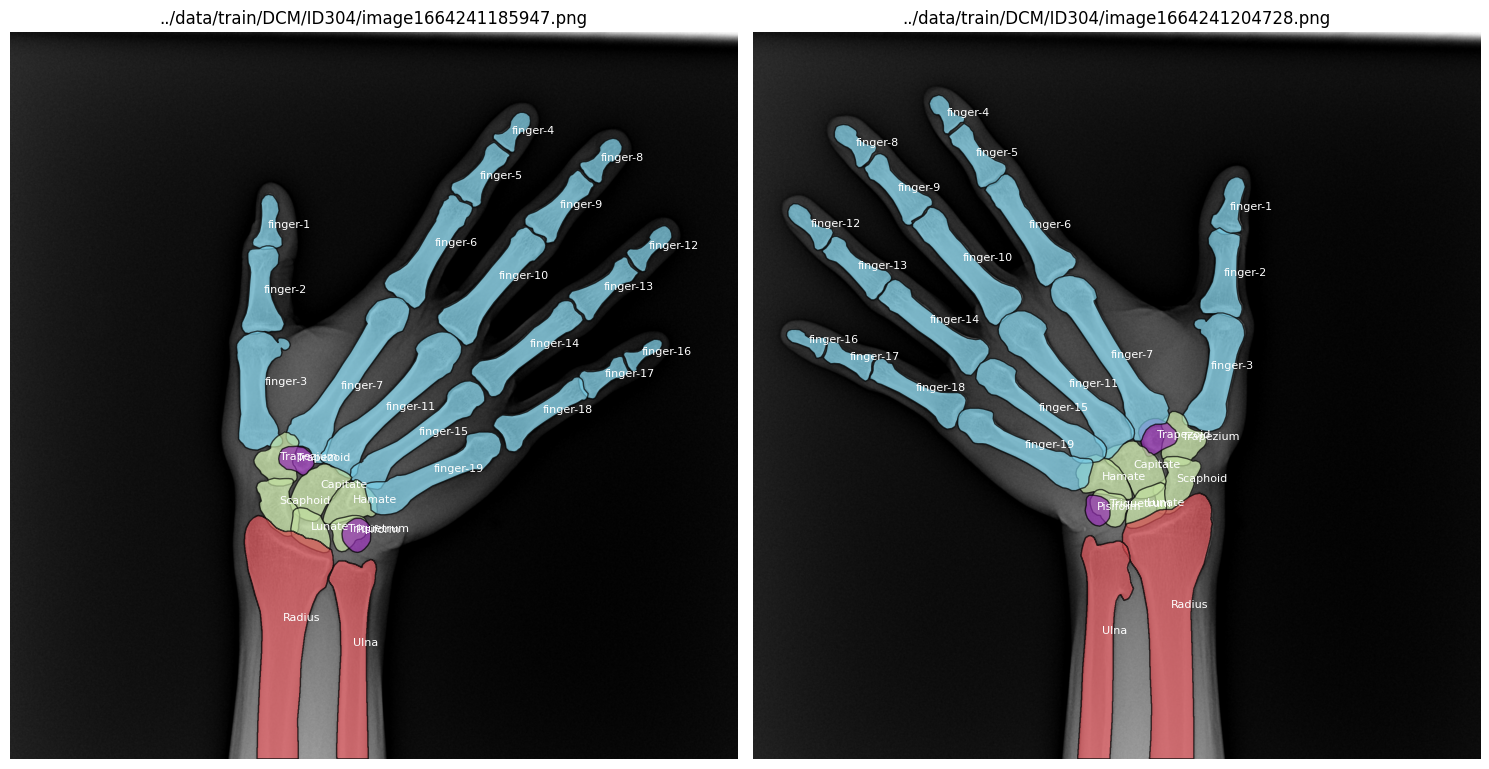

In [29]:
random_vis_with_plt('train')